# Understanding the Haar Measure

### 1. Single Qubit Haar Measure

In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

First, we will observe what happen when we define Haar measure naively.

In [20]:
np.random.seed(42)
dev = qml.device('default.mixed', wires = 1)

@qml.qnode(dev)
def not_a_haar_random_unitary():
    phi, theta, omega = 2 * np.pi * np.random.uniform(size = 3)
    qml.Rot(phi, theta, omega, wires = 0)
    return qml.state()

num_samples = 2000

not_haar_samples = [not_a_haar_random_unitary() for _ in range(num_samples)]


Now we have samples of naively defined Haar measures, we can convert the state into vectors of the bloch sphere.

In [23]:
X = np.array([[0,1], [1,0]])
Y = np.array([[0,-1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

def convert_to_bloch_vector(rho):
    ax = np.trace(np.dot(rho, X)).real
    ay = np.trace(np.dot(rho, Y)).real
    az = np.trace(np.dot(rho, Z)).real
    return [ax, ay, az]

In [24]:
not_haar_bloch_vectors = np.array([convert_to_bloch_vector(s) for s in not_haar_samples])

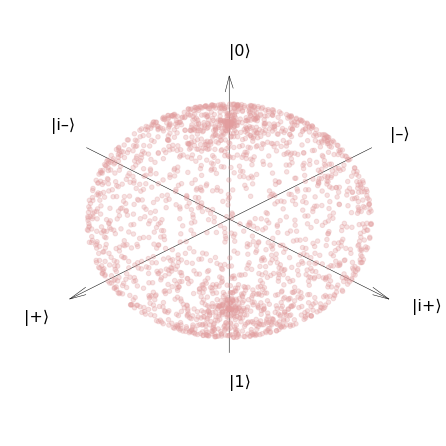

In [39]:
def plot_bloch_sphere(bloch_vectors):
    
    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(111, projection = '3d')
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1)
    
    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(30, 45)
    ax.dist = 7
    
    x, y, z = np.array([[-1.5,0,0], [0,-1.5,0], [0,0,-1.5]])
    u, v, w = np.array([[3,0,0], [0,3,0], [0,0,3]])
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05, color="black", linewidth=0.5)

    ax.text(0, 0, 1.7, r"|0⟩", color="black", fontsize=16)
    ax.text(0, 0, -1.9, r"|1⟩", color="black", fontsize=16)
    ax.text(1.9, 0, 0, r"|+⟩", color="black", fontsize=16)
    ax.text(-1.7, 0, 0, r"|–⟩", color="black", fontsize=16)
    ax.text(0, 1.7, 0, r"|i+⟩", color="black", fontsize=16)
    ax.text(0,-1.9, 0, r"|i–⟩", color="black", fontsize=16)

    ax.scatter(
        bloch_vectors[:,0], bloch_vectors[:,1], bloch_vectors[:, 2], c='#e29d9e', alpha=0.3
    )

plot_bloch_sphere(not_haar_bloch_vectors)

In [26]:
from scipy.stats import rv_continuous

class sin_prob_dist(rv_continuous):
    def _pdf(self, theta):
        return 0.5 * np.sin(theta)

sin_sampler = sin_prob_dist(a = 0, b =np.pi)

In [55]:
@qml.qnode(dev)
def haar_random_unitary():
    phi, omega = 2 * np.pi * np.random.uniform(size = 2)
    theta = sin_sampler.rvs(size = 1)
    qml.Rot(phi, theta, omega, wires = 0)
    return qml.state()

haar_samples = np.array([haar_random_unitary() for _ in range(num_samples)])
haar_vectors = np.array([convert_to_bloch_vector(rho) for rho in haar_samples])

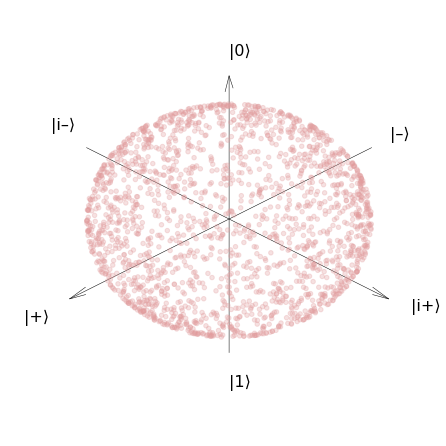

In [56]:
plot_bloch_sphere(haar_vectors)